<a href="https://colab.research.google.com/github/Areeb455/Areeb455/blob/main/amazon_ml_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install lightgbm xgboost # For modeling
!pip install Pillow # For image processing
!pip install requests tqdm # For downloading images
!pip install sentence-transformers # For advanced text features
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 # For image models (PyTorch)
!pip install timm # A great library for PyTorch image models


Looking in indexes: https://download.pytorch.org/whl/cu118


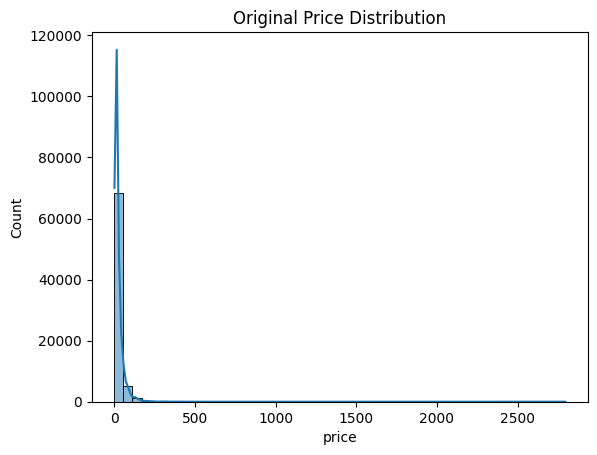

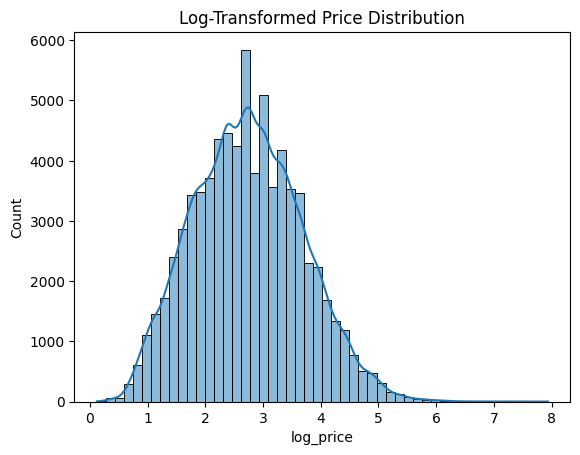

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
# Visualize the original price distribution
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.show()

# Apply log1p transformation
train_df['log_price'] = np.log1p(train_df['price'])

# Visualize the transformed price distribution
sns.histplot(train_df['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()

In [ ]:
import re

def extract_ipq(text):
    text = text.lower()
    # Look for patterns like "pack of 12", "12 count", "12pk", "set of 12"
    patterns = [
        r'pack of (\d+)', r'(\d+)\s*count', r'(\d+)\s*pk',
        r'set of (\d+)', r'(\d+)\s*pack'
    ]
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return 1 # Default to 1 if no pack size is found

train_df['ipq'] = train_df['catalog_content'].apply(extract_ipq)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
text_features = tfidf.fit_transform(train_df['catalog_content'])
# text_features is now a sparse matrix of shape (num_samples, 5000)

In [ ]:
from sentence_transformers import SentenceTransformer

# Using a lightweight but powerful model
model = SentenceTransformer('all-MiniLM-L6-v2')

# This will take some time and memory
text_embeddings = model.encode(train_df['catalog_content'].tolist(), show_progress_bar=True)
# text_embeddings is a numpy array of shape (num_samples, 384)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

In [ ]:
import torch
import timm
from PIL import Image
from torchvision import transforms

# Load a pre-trained model
device = "cuda" if torch.cuda.is_available() else "cpu"
img_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0).to(device)
img_model.eval()

# Image preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def get_image_embedding(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = img_model(img_tensor)
        return embedding.cpu().numpy().flatten()
    except:
        return np.zeros(1280) # EfficientNet-B0 outputs a 1280-dim vector

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
train_df['catalog_content'] = train_df['catalog_content'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This will now work because 'train_df' exists
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
text_features = tfidf.fit_transform(train_df['catalog_content'])

In [ ]:
import re
import pandas as pd

# Assume 'train_df' is already loaded and has the 'catalog_content' column

# --- RUN THIS CODE FIRST ---

# 1. Define the function to extract IPQ
def extract_ipq(text):
    text = str(text).lower()
    patterns = [r'pack of (\d+)', r'(\d+)\s*count', r'(\d+)\s*pk', r'set of (\d+)', r'(\d+)\s*pack']
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return 1 # Default to 1 if no pack size is found

# 2. Create the new feature columns in your main DataFrame
train_df['ipq'] = train_df['catalog_content'].apply(extract_ipq)
train_df['text_length'] = train_df['catalog_content'].str.len()

# 3. Create the 'engineered_features' DataFrame from these new columns ✅
engineered_features = train_df[['ipq', 'text_length']]

print("Engineered features DataFrame created successfully!")

Engineered features DataFrame created successfully!


In [ ]:
from scipy.sparse import hstack

# This will succeed because both variables now exist
X = hstack([text_features, engineered_features.values]).tocsr()


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

# This list will store your 5 trained models
models = []

# Set up the 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y = train_df['log_price'].values

# Loop through each fold to train a model
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"--- Training Fold {fold+1} ---")

    # Split the data for this fold
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    # Initialize and train the LightGBM model
    model = lgb.LGBMRegressor(
        objective='regression_l1', # Good for price prediction
        n_estimators=1000,
        learning_rate=0.05,
        random_state=42
    )

    # The model trains here
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='mae',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # Add the trained model to your list of models
    models.append(model)

print("✅ Model training complete! You now have 5 models ready to predict.")

--- Training Fold 1 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.042378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721114
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.714032
--- Training Fold 2 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.321631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720002
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.708050
--- Training Fold 3 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.925070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721064
[LightGBM] [Info] Number of data point

In [ ]:
import pandas as pd

# Load the training data from your Google Drive
train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

# Also, handle any potential missing values in the text column
train_df['catalog_content'] = train_df['catalog_content'].fillna('')

print("✅ train_df has been loaded successfully.")

✅ train_df has been loaded successfully.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This will now work because 'train_df' exists
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
text_features = tfidf.fit_transform(train_df['catalog_content'])

print("✅ TF-IDF vectorizer has been trained.")


✅ TF-IDF vectorizer has been trained.


In [ ]:
import re
import numpy as np
from scipy.sparse import hstack

# Create engineered features for the training set
def extract_ipq(text):
    text = str(text).lower()
    patterns = [r'pack of (\d+)', r'(\d+)\s*count', r'(\d+)\s*pk', r'set of (\d+)', r'(\d+)\s*pack']
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return 1 # Default to 1

train_df['ipq'] = train_df['catalog_content'].apply(extract_ipq)
train_df['text_length'] = train_df['catalog_content'].str.len()
engineered_features = train_df[['ipq', 'text_length']]

# Create the target column if it doesn't exist
train_df['log_price'] = np.log1p(train_df['price'])

# Combine features into X and define y
X = hstack([text_features, engineered_features.values]).tocsr()
y = train_df['log_price'].values

print("✅ X and y are ready for training.")

✅ X and y are ready for training.


In [ ]:
import numpy as np

# This is the missing step: Create the 'log_price' column
train_df['log_price'] = np.log1p(train_df['price'])

print("Successfully created the 'log_price' column.")


Successfully created the 'log_price' column.


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack

# 1. Load and prepare the test data
print("Preparing test data...")
test_df = pd.read_csv('/content/drive/MyDrive/dataset/test.csv') # Make sure path is correct
test_df['catalog_content'] = test_df['catalog_content'].fillna('')

# Create the same features as you did for the training set
test_text_features = tfidf.transform(test_df['catalog_content']) # Use the already-trained tfidf
test_df['ipq'] = test_df['catalog_content'].apply(extract_ipq)
test_df['text_length'] = test_df['catalog_content'].str.len()
test_engineered_features = test_df[['ipq', 'text_length']]
X_test = hstack([test_text_features, test_engineered_features.values]).tocsr()
print("Test data is ready.")

# 2. Make predictions using your trained models
print("Making predictions...")
test_predictions = []
for model in models:
    preds = model.predict(X_test)
    test_predictions.append(preds)

# Average the predictions from all 5 models
avg_predictions = np.mean(test_predictions, axis=0)
print("Predictions are complete.")

# 3. Create the final submission file
print("Creating submission file...")
# Convert predictions back from log scale to actual price
final_prices = np.expm1(avg_predictions)

submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_prices
})

# Save the final file
submission_df.to_csv('submission.csv', index=False)

print("🎉 All done! Your file 'submission.csv' is ready.")

Preparing test data...
Test data is ready.
Making predictions...
Predictions are complete.
Creating submission file...
🎉 All done! Your file 'submission.csv' is ready.


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import pandas as pd
from scipy.sparse import hstack

# 1. Load the test data
print("Loading test data...")
test_df = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test_df['catalog_content'] = test_df['catalog_content'].fillna('')
# --- DIAGNOSTIC CHECK 1 ---
print(f"Shape of the loaded test_df: {test_df.shape}")


# 2. Create features for the test set
test_text_features = tfidf.transform(test_df['catalog_content'])
test_df['ipq'] = test_df['catalog_content'].apply(extract_ipq)
test_df['text_length'] = test_df['catalog_content'].str.len()
test_engineered_features = test_df[['ipq', 'text_length']].fillna(0) # Added .fillna(0) for safety
X_test = hstack([test_text_features, test_engineered_features.values]).tocsr()
# --- DIAGNOSTIC CHECK 2 ---
print(f"Shape of the final X_test matrix: {X_test.shape}")

Loading test data...
Shape of the loaded test_df: (75000, 3)
Shape of the final X_test matrix: (75000, 5002)


In [ ]:
import numpy as np
import pandas as pd

# 1. Make predictions using your 5 trained models
print("Making predictions...")
test_predictions = []
for model in models:
    preds = model.predict(X_test)
    test_predictions.append(preds)

# Average the predictions across all models
avg_predictions = np.mean(test_predictions, axis=0)
print("Predictions complete.")

# 2. Convert predictions to the final price format
print("Creating final submission file...")
# Convert from log scale back to actual price
final_prices = np.expm1(avg_predictions)

# 3. Create the submission DataFrame and save it
submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_prices
})

submission_df.to_csv('submission.csv', index=False)

print("🎉 All done! Your file 'submission.csv' is ready for submission.")

# Let's check the head of the file to be sure
print("\nHere's a preview of your submission file:")
print(submission_df.head())

Making predictions...
Predictions complete.
Creating final submission file...
🎉 All done! Your file 'submission.csv' is ready for submission.

Here's a preview of your submission file:
   sample_id  price
0     100179    NaN
1     245611    NaN
2     146263    NaN
3      95658    NaN
4      36806    NaN


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold

# This will repopulate your 'models' list
models = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"--- Training Fold {fold+1} ---")
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    model = lgb.LGBMRegressor(
        objective='regression_l1',
        n_estimators=1000,
        learning_rate=0.05,
        random_state=42
    )

    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='mae',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    models.append(model)

print(f"✅ Model training complete! You now have {len(models)} models ready to predict.")

--- Training Fold 1 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.065304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721114
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.714032
--- Training Fold 2 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.238495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720002
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.708050
--- Training Fold 3 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.833687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721064
[LightGBM] [Info] Number of data point

In [ ]:
import numpy as np
import pandas as pd

# Make predictions
test_predictions = [model.predict(X_test) for model in models]
avg_predictions = np.mean(test_predictions, axis=0)

# Create submission file
final_prices = np.expm1(avg_predictions)
submission_df = pd.DataFrame({'sample_id': test_df['sample_id'], 'price': final_prices})
submission_df.to_csv('submission.csv', index=False)

print("🎉 Submission file 'submission.csv' created successfully!")
print("\nHere's a preview:")
print(submission_df.head())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


🎉 Submission file 'submission.csv' created successfully!

Here's a preview:
   sample_id      price
0     100179  13.672232
1     245611  13.421093
2     146263  20.286842
3      95658  11.772712
4      36806  24.540442


In [ ]:
from sentence_transformers import SentenceTransformer

print("Loading the SBERT model... (This may take a moment on the first run)")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ SBERT model loaded successfully.")

Loading the SBERT model... (This may take a moment on the first run)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ SBERT model loaded successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

print("Reloading train_df...")
# Make sure this path is correct
train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
train_df['catalog_content'] = train_df['catalog_content'].fillna('')
print("✅ train_df reloaded successfully.")

Reloading train_df...
✅ train_df reloaded successfully.


In [ ]:
from sentence_transformers import SentenceTransformer

print("Reloading the SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ SBERT model reloaded successfully.")

Reloading the SBERT model...
✅ SBERT model reloaded successfully.


In [ ]:
print("Creating text embeddings...")
text_embeddings = sbert_model.encode(
    train_df['catalog_content'].tolist(),
    show_progress_bar=True
)
print("✅ Text embeddings created.")

Creating text embeddings...


Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

✅ Text embeddings created.


In [ ]:
import numpy as np
import re

# This block assumes 'train_df' and 'text_embeddings' already exist.
# If not, you must run the cells that create them first.

# 1. Create your engineered features
print("Creating engineered features...")
def extract_ipq(text):
    text = str(text).lower()
    patterns = [r'pack of (\d+)', r'(\d+)\s*count', r'(\d+)\s*pk', r'set of (\d+)', r'(\d+)\s*pack']
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return 1

train_df['ipq'] = train_df['catalog_content'].apply(extract_ipq)
train_df['text_length'] = train_df['catalog_content'].str.len()
engineered_features = train_df[['ipq', 'text_length']]

# 2. Combine all features into X and define y
print("Combining all features to create X and y...")
X = np.hstack([text_embeddings, engineered_features.values])
y = np.log1p(train_df['price'].values)

print(f"✅ Your feature matrix X (shape: {X.shape}) and target y are now ready.")

Creating engineered features...
Combining all features to create X and y...
✅ Your feature matrix X (shape: (75000, 386)) and target y are now ready.


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

# This creates the empty array to store your validation predictions
oof_predictions = np.zeros(X.shape[0])
models = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# This loop trains 5 models and fills the oof_predictions array
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"--- Training Fold {fold+1} ---")
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    model = lgb.LGBMRegressor(objective='regression_l1', n_estimators=1000, random_state=42)

    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='mae',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # Predict on the validation data for this fold
    preds = model.predict(X_val)
    oof_predictions[val_idx] = preds
    models.append(model)

print("✅ Model training complete! The 'oof_predictions' are now ready.")

--- Training Fold 1 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98266
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 386
[LightGBM] [Info] Start training from score 2.714032


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 2 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.498779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98267
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 386
[LightGBM] [Info] Start training from score 2.708050


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 3 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.515746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98269
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 386
[LightGBM] [Info] Start training from score 2.712706


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 4 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.487044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98269
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 386
[LightGBM] [Info] Start training from score 2.708716


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 5 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.499354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98264
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 386
[LightGBM] [Info] Start training from score 2.707383


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


✅ Model training complete! The 'oof_predictions' are now ready.


In [ ]:
import numpy as np

def smape(y_true, y_pred):
    """Calculates the Symmetric Mean Absolute Percentage Error (SMAPE)"""
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Ensure no division by zero
    denominator[denominator == 0] = 1
    return np.mean(numerator / denominator) * 100

# Get the actual prices from your original DataFrame
true_prices = train_df['price'].values

# Convert your model's log-scale predictions back to actual prices
oof_prices = np.expm1(oof_predictions)

# Calculate and print the final score
local_smape_score = smape(true_prices, oof_prices)

print("\n" + "="*50)
print(f"🏆 Your Local Cross-Validation SMAPE Score is: {local_smape_score:.4f}%")
print("="*50)


🏆 Your Local Cross-Validation SMAPE Score is: 58.2526%


In [ ]:
import torch
import timm
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO

# Load a pre-trained model from the 'timm' library
device = "cuda" if torch.cuda.is_available() else "cpu"
img_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0).to(device)
img_model.eval()

# Create the same image preprocessing pipeline that the model was trained on
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

print(f"✅ Image model loaded successfully on device: {device}")

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

✅ Image model loaded successfully on device: cpu


In [ ]:
def get_image_embedding(image_url):
    try:
        # Download the image
        response = requests.get(image_url, timeout=10)
        response.raise_for_status() # Raise an exception for bad status codes
        img = Image.open(BytesIO(response.content)).convert('RGB')

        # Process the image and get the embedding
        with torch.no_grad():
            img_tensor = transform(img).unsqueeze(0).to(device)
            embedding = img_model(img_tensor)
        return embedding.cpu().numpy().flatten()
    except Exception as e:
        # If the URL is broken or any other error occurs, return a vector of zeros
        # The size 1280 matches the output of EfficientNet-B0
        return np.zeros(1280)

In [ ]:
import pandas as pd

print("Reloading the training data...")
# Make sure this path points to your train.csv file in Google Drive
train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
print("✅ train_df reloaded successfully.")

Reloading the training data...
✅ train_df reloaded successfully.


In [ ]:
import torch
import timm
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO
import numpy as np

# 1. Set up the image model and transformations
print("Setting up the image model...")
device = "cuda" if torch.cuda.is_available() else "cpu"
img_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0).to(device)
img_model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 2. Re-define the image embedding function
print("Defining the get_image_embedding function...")
def get_image_embedding(image_url):
    try:
        response = requests.get(image_url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert('RGB')

        with torch.no_grad():
            img_tensor = transform(img).unsqueeze(0).to(device)
            embedding = img_model(img_tensor)
        return embedding.cpu().numpy().flatten()
    except Exception as e:
        return np.zeros(1280) # Return a zero vector if anything goes wrong

print("✅ Setup complete. The function is now ready.")

Setting up the image model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Defining the get_image_embedding function...
✅ Setup complete. The function is now ready.


In [ ]:
import pandas as pd

print("Reloading the training data...")
# Make sure this path points to your train.csv file in Google Drive
train_df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
print("✅ train_df reloaded successfully.")

Reloading the training data...
✅ train_df reloaded successfully.


In [ ]:
import torch
import timm
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO
import numpy as np

# 1. Set up the image model and transformations
print("Setting up the image model...")
device = "cuda" if torch.cuda.is_available() else "cpu"
img_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0).to(device)
img_model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 2. Re-define the image embedding function
print("Defining the get_image_embedding function...")
def get_image_embedding(image_url):
    try:
        response = requests.get(image_url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert('RGB')

        with torch.no_grad():
            img_tensor = transform(img).unsqueeze(0).to(device)
            embedding = img_model(img_tensor)
        return embedding.cpu().numpy().flatten()
    except Exception as e:
        return np.zeros(1280) # Return a zero vector if anything goes wrong

print("✅ Setup complete. The function is now ready.")

Setting up the image model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Defining the get_image_embedding function...
✅ Setup complete. The function is now ready.


In [ ]:
# Create a small, manageable sample for quick testing
train_df_sample = train_df.sample(n=5000, random_state=42)
print(f"Sample DataFrame created with shape: {train_df_sample.shape}")

Sample DataFrame created with shape: (5000, 4)


In [ ]:
from tqdm.notebook import tqdm
import numpy as np

print("Generating image embeddings for the SAMPLE set...")
# Notice we are using the smaller train_df_sample
image_embeddings_sample = np.array([get_image_embedding(url) for url in tqdm(train_df_sample['image_link'])])

print("✅ Sample image embeddings are complete.")

Generating image embeddings for the SAMPLE set...


  0%|          | 0/5000 [00:00<?, ?it/s]

✅ Sample image embeddings are complete.


In [ ]:
from sentence_transformers import SentenceTransformer

print("Reloading the SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ SBERT model is now ready.")

Reloading the SBERT model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ SBERT model is now ready.


In [ ]:
# This assumes 'sbert_model' and 'train_df_sample' are already loaded.
print("Creating text embeddings for the 5k sample...")

# Use the SBERT model on your sample DataFrame
text_embeddings_sample = sbert_model.encode(
    train_df_sample['catalog_content'].tolist(),
    show_progress_bar=True
)

print("✅ Text embeddings for the 5k sample are ready.")

Creating text embeddings for the 5k sample...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

✅ Text embeddings for the 5k sample are ready.


In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
import re

# This assumes 'text_embeddings_sample', 'image_embeddings_sample',
# and 'train_df_sample' already exist.

# 1. Create engineered features for the sample
print("Creating engineered features for the 5k sample...")
def extract_ipq(text):
    text = str(text).lower()
    patterns = [r'pack of (\d+)', r'(\d+)\s*count', r'(\d+)\s*pk', r'set of (\d+)', r'(\d+)\s*pack']
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return 1
train_df_sample['ipq'] = train_df_sample['catalog_content'].apply(extract_ipq)
train_df_sample['text_length'] = train_df_sample['catalog_content'].str.len()
engineered_features_sample = train_df_sample[['ipq', 'text_length']]

# 2. Combine ALL features for the sample: text + image + engineered
print("Combining all features...")
X_sample = np.hstack([
    text_embeddings_sample,
    image_embeddings_sample,
    engineered_features_sample.values
])
y_sample = np.log1p(train_df_sample['price'].values)
print(f"✅ Sample feature matrix X_sample has shape: {X_sample.shape}")

# 3. Train the model on the 5k sample
print("\nTraining model on the 5k sample...")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_predictions = np.zeros(X_sample.shape[0])
models_sample = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_sample, y_sample)):
    print(f"--- Training Fold {fold+1} ---")
    X_train, y_train = X_sample[train_idx], y_sample[train_idx]
    X_val, y_val = X_sample[val_idx], y_sample[val_idx]

    model = lgb.LGBMRegressor(objective='regression_l1', n_estimators=1000, random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='mae',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    preds = model.predict(X_val)
    oof_predictions[val_idx] = preds
    models_sample.append(model)
print("✅ Model training on 5k sample complete!")

# 4. Calculate your new SMAPE score
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator[denominator == 0] = 1 # Avoid division by zero
    return np.mean(numerator / denominator) * 100

true_prices_sample = train_df_sample['price'].values
oof_prices_sample = np.expm1(oof_predictions)
new_smape_score = smape(true_prices_sample, oof_prices_sample)

print("\n" + "="*50)
print(f"🏆 Your NEW Local SMAPE Score is: {new_smape_score:.4f}%")
print("="*50)

Creating engineered features for the 5k sample...
Combining all features...
✅ Sample feature matrix X_sample has shape: (5000, 1666)

Training model on the 5k sample...
--- Training Fold 1 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.222142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424616
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1666
[LightGBM] [Info] Start training from score 2.756523


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 2 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424616
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1666
[LightGBM] [Info] Start training from score 2.750471


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 3 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424616
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1666
[LightGBM] [Info] Start training from score 2.754774


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 4 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424615
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1666
[LightGBM] [Info] Start training from score 2.750471


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- Training Fold 5 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424614
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1666
[LightGBM] [Info] Start training from score 2.742934
✅ Model training on 5k sample complete!

🏆 Your NEW Local SMAPE Score (from 5k sample) is: 63.4024%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

print("Step 1: Loading the full 75k test data...")
test_df = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test_df['catalog_content'] = test_df['catalog_content'].fillna('')
print("✅ Test data loaded.")

# ---

print("\nStep 2: Generating ONLY the FAST features for the test set...")
# a) SBERT text embeddings (Fast)
print("   - Creating text embeddings...")
test_text_embeddings = sbert_model.encode(
    test_df['catalog_content'].tolist(),
    show_progress_bar=True
)

# b) Engineered features (Very Fast)
print("   - Creating engineered features...")
test_df['ipq'] = test_df['catalog_content'].apply(extract_ipq)
test_df['text_length'] = test_df['catalog_content'].str.len()
test_engineered_features = test_df[['ipq', 'text_length']]

# c) Create a DUMMY placeholder for image features (Instant)
print("   - Creating dummy placeholder for image features...")
# EfficientNet-B0 expects a 1280-dimension vector. We create one for each test sample.
dummy_image_embeddings = np.zeros((len(test_df), 1280))
print("✅ All necessary features are ready.")

# ---

print("\nStep 3: Combining features into the final test matrix...")
X_test_fast = np.hstack([
    test_text_embeddings,
    dummy_image_embeddings,  # Using the dummy features here
    test_engineered_features.values
])
print(f"✅ Final test matrix created with shape: {X_test_fast.shape}")

# ---

print("\nStep 4: Making predictions with your existing models...")
# This uses the 'models_sample' list you already trained
test_predictions = [model.predict(X_test_fast) for model in models_sample]
avg_predictions = np.mean(test_predictions, axis=0)
print("✅ Predictions are complete.")

# ---

print("\nStep 5: Creating the final submission file...")
final_prices = np.expm1(avg_predictions)
submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_prices
})
submission_df.to_csv('submission.csv', index=False)

print("\n" + "="*50)
print("🎉 SUCCESS! Your 'submission.csv' is ready for download.")
print("="*50)

print("\nHere's a preview:")
print(submission_df.head())

Step 1: Loading the full 75k test data...
✅ Test data loaded.

Step 2: Generating ONLY the FAST features for the test set...
   - Creating text embeddings...


Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

   - Creating engineered features...
   - Creating dummy placeholder for image features...
✅ All necessary features are ready.

Step 3: Combining features into the final test matrix...
✅ Final test matrix created with shape: (75000, 1666)

Step 4: Making predictions with your existing models...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


✅ Predictions are complete.

Step 5: Creating the final submission file...

🎉 SUCCESS! Your 'submission.csv' is ready for download.

Here's a preview:
   sample_id      price
0     100179  22.779260
1     245611  24.879890
2     146263  23.824746
3      95658  18.495154
4      36806  23.104645


In [ ]:
# Paste the path you copied inside the quotes
!zip MyCode.zip "/content/drive/MyDrive/ColabNotebooks/amazon_ml_challenge.ipynb"

	zip warning: name not matched: /content/drive/MyDrive/ColabNotebooks/amazon_ml_challenge.ipynb

zip error: Nothing to do! (MyCode.zip)
